<a href="https://colab.research.google.com/github/sudhakar1504/Machine-Learning/blob/main/BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [40]:
df = pd.read_csv('/content/HR_comma_sep.csv')
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [41]:
df.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [42]:
df.groupby('left')


In [43]:
df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years Department  salary  
0                          0      sales     low  
1                          0      sales  medium  
2                          0      sales  medium  
3                          0      sales     low  
4                          0      sales     low  
...                      ...        ...     ...  
14994                      0    support     low  
14995                      0    support     low  
14996                      0    support     low  
14997                      0    support     low  
14998                      0    support     low  

[14999 rows x 10 columns]

In [44]:
left = df[df.left==1]
left.shape

(3571, 10)

In [45]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

<Axes: xlabel='salary'>

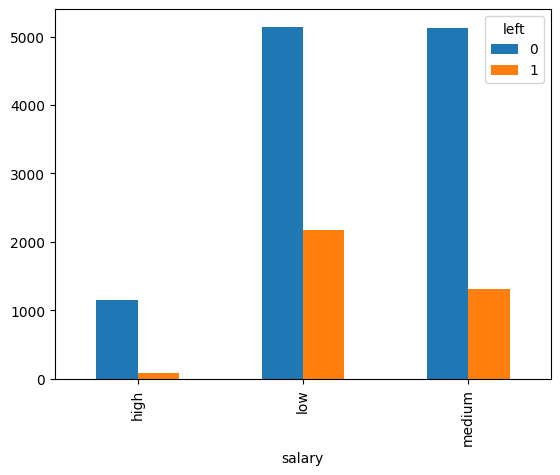

In [46]:
pd.crosstab(df.salary,df.left).plot(kind='bar')


In [47]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

<Axes: xlabel='Department'>

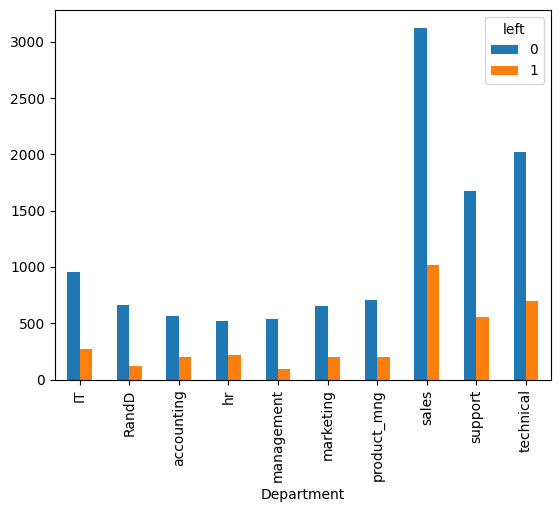

In [48]:
pd.crosstab(df.Department,df.left).plot(kind='bar')


In [49]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','left']]
subdf.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary  \
0                0.38                   157                      0     low   
1                0.80                   262                      0  medium   
2                0.11                   272                      0  medium   
3                0.72                   223                      0     low   
4                0.37                   159                      0     low   

   left  
0     1  
1     1  
2     1  
3     1  
4     1

In [51]:
# prompt: make dummies value for salary like 1,0

salary_dummies = pd.get_dummies(subdf.salary, prefix="salary",dtype=int)
subdf_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
subdf_with_dummies.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary  \
0                0.38                   157                      0     low   
1                0.80                   262                      0  medium   
2                0.11                   272                      0  medium   
3                0.72                   223                      0     low   
4                0.37                   159                      0     low   

   left  salary_high  salary_low  salary_medium  
0     1            0           1              0  
1     1            0           0              1  
2     1            0           0              1  
3     1            0           1              0  
4     1            0           1              0

In [53]:
X = subdf_with_dummies.drop(['left','salary'],axis='columns')
Y = subdf_with_dummies.left

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [59]:
#model
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [60]:
model.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
model.score(X_train,y_train)

0.7791218211258215

In [62]:
model.score(X_test,y_test)

0.7735555555555556

In [63]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [66]:
model.predict([[0.5,245,0,0,1,0]])
#0.37,0.52,2,159,3,0,1,0,sales,low
#0.5,0.87,5,245,2,0,0,0,technical,low

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [69]:
subdf_with_dummies.sample()

satisfaction_level  average_montly_hours  promotion_last_5years salary  \
1229                0.42                   148                      0    low   

      left  salary_high  salary_low  salary_medium  
1229     1            0           1              0

In [70]:
#1843	0.41	147	0	low	1	0	1	0
#0.42	148	0	low	1	0	1	0
model.predict([[0.42,148,0,0,1,0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

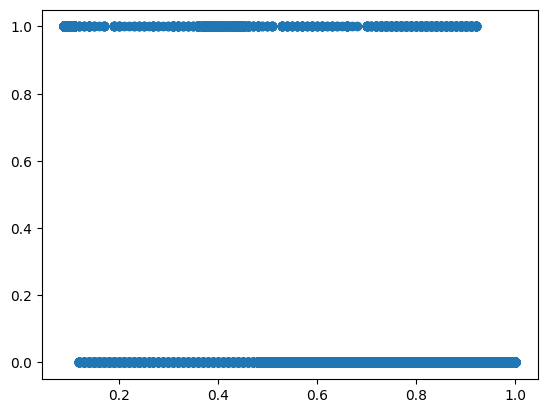

In [72]:
plt.scatter(df.satisfaction_level,df.left)